In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [5]:

def wander(homeDist, allyDist):
    return 6 - homeDist - allyDist

def flee(allyDist, homeDist):
    return allyDist + homeDist

def attack(homeDist, enemyDist):
    return 8 - homeDist - enemyDist

In [7]:
DIST = np.arange(0, 10, 0.25)

img = np.zeros((DIST.shape[0], DIST.shape[0], DIST.shape[0]))
ht = np.zeros((3, DIST.shape[0], DIST.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, allyDist in enumerate(DIST):
    for y, homeDist in enumerate(DIST):
        for z, enemyDist in enumerate(DIST):
            utility = np.array([wander(homeDist, allyDist), flee(allyDist, homeDist), attack(homeDist, enemyDist)])
            for i in range(utility.shape[0]):
                ht[i][x][y][z] = utility[i]
            img[x][y][z] = np.argmax(utility)

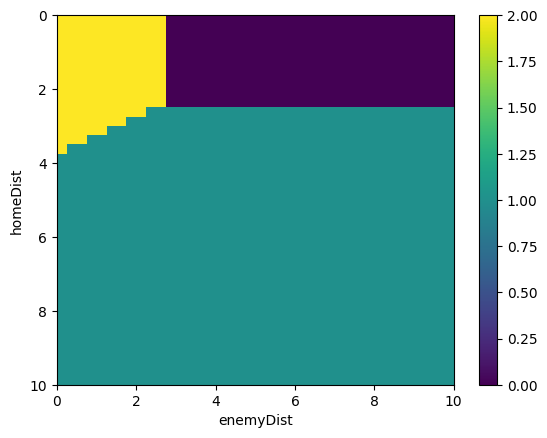

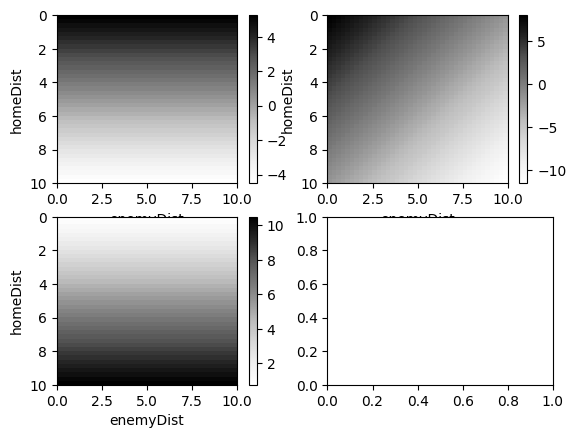

In [22]:

imgCut = img[3, :, :]
htCut = ht[:, 3, :, :]

xlabel = 'enemyDist'
ylabel = 'homeDist'

fig, ax = plt.subplots()
im = ax.imshow(imgCut, extent=[0, 10, 10, 0])
ax.set_aspect('auto')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)


plt.colorbar(im)

fig, ax = plt.subplots(2, 2)
for i in range(3):
    im = ax[i % 2, i // 2].imshow(htCut[i], extent=[0, 10, 10, 0], cmap='Greys')
    ax[i % 2, i // 2].set_aspect('auto')
    ax[i % 2, i // 2].set_xlabel(xlabel)
    ax[i % 2, i // 2].set_ylabel(ylabel)
    plt.colorbar(im)